# Lab 6: Clustering 

In this lab, you will gain more experience with clustering. In particular, you will learn how to use two of the most popular clustering algorithms: Hierarchical Clustering and K-Means Clustering. Then, you will be asked to apply this knowledge on a document data set.

## Lab 6.A: Clustering Tutorial with Questions (50% of grade)

Let us start by importing the needed libraries. We will for the first time use sklearn library, which implements many of the most popular data science algorithms. We will be using this library often for the rest of this course. Please, take a moment to look at the sklearn documentation at: http://scikit-learn.org/stable/.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from pandas import crosstab
from pandas.tools.plotting import scatter_matrix
import pandas as p
%matplotlib inline

In [2]:
df = p.DataFrame()
df["Up"]=range(1,11)
df["Down"]=range(10,0,-1)
print (df)

   Up  Down
0   1    10
1   2     9
2   3     8
3   4     7
4   5     6
5   6     5
6   7     4
7   8     3
8   9     2
9  10     1


In [43]:
df=p.DataFrame()
df["y"]=[1.1,2.2,3.3,4,5,6,7,8,9,10,11,12]
df["x"]=[2,3,4,5,6,7,8,9,11,12,12,13]
df["Month2"] = p.Series(['A', "A",'B', 'C', 'D', 'E', 'f', 'j', 'h'])
print (df)
#df["Month2"].unique()
#df["Month"].mean()
p.crosstab(df["x"],df["y"])

       y   x Month2
0    1.1   2      A
1    2.2   3      A
2    3.3   4      B
3    4.0   5      C
4    5.0   6      D
5    6.0   7      E
6    7.0   8      f
7    8.0   9      j
8    9.0  11      h
9   10.0  12    NaN
10  11.0  12    NaN
11  12.0  13    NaN


y,1.1,2.2,3.3,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
x,,,,,,,,,,,,
2,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0,0,0,0,0
8,0,0,0,0,0,0,1,0,0,0,0,0
9,0,0,0,0,0,0,0,1,0,0,0,0
11,0,0,0,0,0,0,0,0,1,0,0,0


Let us load the Iris data set and plot a scatter plot of the 2nd and 3rd attributes.

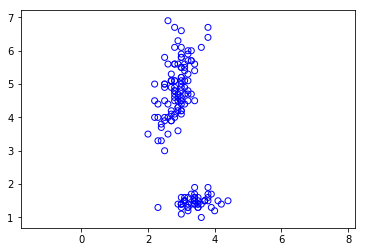

In [74]:
iris = datasets.load_iris()
d = iris.data
y = iris.target
plt.scatter(d[:,1],d[:,2],facecolors='none',color='blue')
plt.axis('equal');

## Hierarchical Clustering
Let us run the **hierarchical clustering** on the 2 columns of Iris. We will use only the first 20 rows. We'll call this new data set `dnew`.

In [75]:
A=range(0,20)#number of row
dnew = d[A,1:3]#row 0 to 20, #column 1 to 3

In [76]:
# Build a dendrogram using single-linkage clustering and Euclidean distance
Z = hierarchy.linkage(dnew,method = 'single', metric = 'euclidean')
# Picks 2 clusters
cl = hierarchy.fcluster(Z, 2, criterion='maxclust')

Let us now plot the dendrogram. 

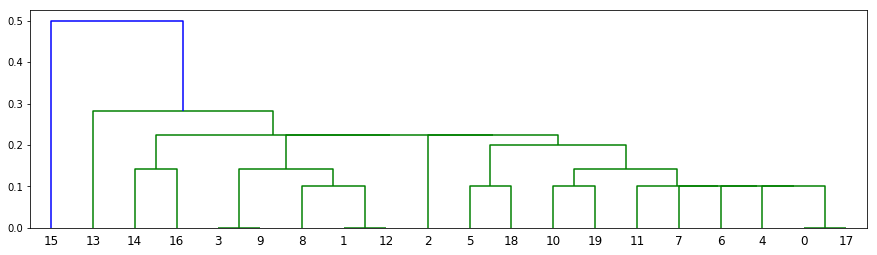

In [77]:
plt.figure(figsize = (15,4))
hierarchy.dendrogram(Z);

And, let us see the outcome of clustering

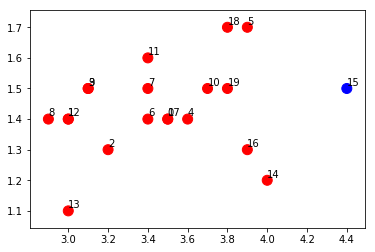

In [78]:
plt.figure()
colors=['red','blue']
plt.scatter(dnew[A,0],dnew[A,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
for i in A:
    plt.text(dnew[i,0],dnew[i,1]+0.01,s=str(i),size=10)

**Question 1**: Let us play with the clustering options
- Make 3 clusters. Discuss the result
- Use several different methods, other than 'single'. Try 'average' and one more of your choice. Discuss the result.
- Use a metric other than 'Eucliedean'. Discuss the result.

**Answer 1**

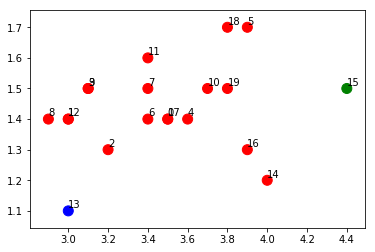

In [79]:
# Make 3 clusters. Discuss the result
cl = hierarchy.fcluster(Z, 3, criterion='maxclust')
plt.figure()
colors=['red','blue','green']
plt.scatter(dnew[A,0],dnew[A,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
for i in A:
    plt.text(dnew[i,0],dnew[i,1]+0.01,s=str(i),size=10)

- With 3 clusters, I can see that one dot had change color to blue. This point seem to have the futherest distance from the rest of other dots. 

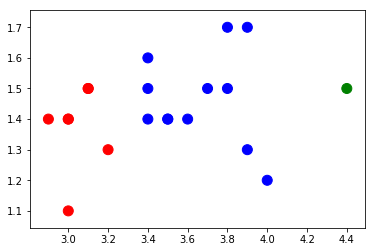

In [80]:
#Use several different methods, other than 'single'. Try 'average' and one more of your choice. Discuss the result.
# Build a dendrogram using single-linkage clustering and Euclidean distance
Z = hierarchy.linkage(dnew,method = 'average', metric = 'euclidean')
# Picks 2 clusters
cl = hierarchy.fcluster(Z, 3, criterion='maxclust')
plt.figure()
colors=['red','blue','green']
plt.scatter(dnew[A,0],dnew[A,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')

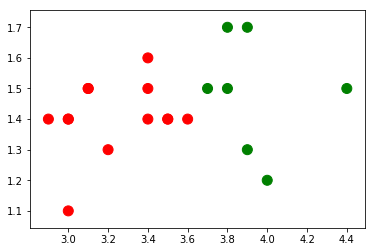

In [81]:
#Use several different methods: one more of your choice. Discuss the result.
# Build a dendrogram using single-linkage clustering and Euclidean distance
Z = hierarchy.linkage(dnew,method = 'complete', metric = 'euclidean')
# Picks 2 clusters
cl = hierarchy.fcluster(Z, 3, criterion='maxclust')
plt.figure()
colors=['red','blue','green']
plt.scatter(dnew[A,0],dnew[A,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')

- Average and Complete. Complete is different from single. Single uses Nearest Point Algorithm. Complete used the the Farthest Point Algorithm or Voor Hees Algorithm. Average uses UPGMA algorithm. I think averge is the best one out of three because it gave me 3 good size of clusters as hypothesis.  

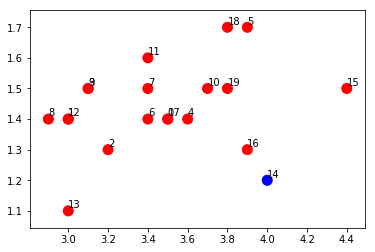

In [82]:
#Use a metric other than 'Eucliedean'. Discuss the result
Z = hierarchy.linkage(dnew,method = 'single', metric = 'cosine')
# Picks 2 clusters
cl = hierarchy.fcluster(Z, 2, criterion='maxclust')
plt.figure()
colors=['red','blue']
plt.scatter(dnew[A,0],dnew[A,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
for i in A:
    plt.text(dnew[i,0],dnew[i,1]+0.01,s=str(i),size=10)

- Cosine is the distance metric to use. In the case cosine

**Question 2**. Run the clustering on the whole Iris data set, using only 2nd and 3rd columns. Plot the results. Try to figure out which is the best number of clusters.

In [83]:
AWhole=range(0,d.shape[0])
dnewWhole = d[AWhole,1:3]#all row, #column 2 to 3
# Build a dendrogram using single-linkage clustering and Euclidean distance
Z = hierarchy.linkage(dnewWhole,method = 'average', metric = 'euclidean')
# Picks 4 clusters
cl = hierarchy.fcluster(Z, 3, criterion='maxclust')

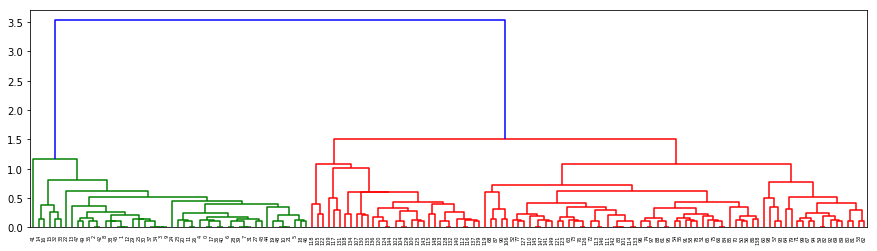

In [84]:
plt.figure(figsize = (15,4))
hierarchy.dendrogram(Z);

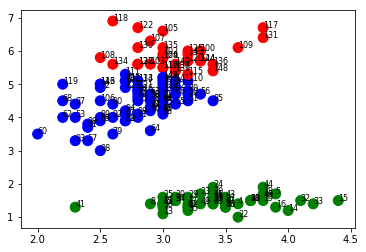

In [85]:
plt.figure()
colors=['green','red','blue']
plt.scatter(dnewWhole[:,0],dnewWhole[:,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
for i in AWhole:
    plt.text(dnewWhole[i,0],dnewWhole[i,1]+0.01,s=str(i),size=8)

- I think the best clsuter is 3 because it gave us 3 good size clusters. 

Each of the 150 flowers in Iris data set is labeled as one of 3 types of Irises. This information is in your variable `y`. Let us look at the cross-tabulation between the found clusters and the type of a flower:

In [86]:
dnew = d[:,1:3]#column 2 and 3
# Build a dendrogram using single-linkage clustering and Euclidean distance
Z = hierarchy.linkage(dnew,method = 'average', metric = 'euclidean')
# Picks 2 clusters
cl = hierarchy.fcluster(Z,2, criterion='maxclust')
crosstab(cl, y, rownames=['cl'], colnames=['y'])

y,0,1,2
cl,,,
1,50,0,0
2,0,50,50


**Question 3**. Discuss the cross-tabulation result. Do you think clustering did a good job?

**Answer 3:** No. Because the crosstab chose 2 clusters in irises in column 2 and 3. However, flower index 1 and 2 and fall in the same cluster. I would pick 3 cluster instead.


**Question 4**. Repeat the clustering, but this time find 3 clusters. Chack the cross-tabulate and discuss if you are happy with the result. Try with 4 and 5 clusters.



**Answer 4** I am happy with result. It showed me which type of flowers are in each clusters As I see 2 or 3 clusters is the perfect choice because the data is solid fit to each clusters. With 3 clusters choice, we can see it exactly like 2 clusters but have 1 data form their own cluster

In [87]:
# Picks 3 clusters
cl = hierarchy.fcluster(Z,3, criterion='maxclust')
crosstab(cl, y, rownames=['cl'], colnames=['y'])

y,0,1,2
cl,,,
1,50,0,0
2,0,0,31
3,0,50,19


In [88]:
AWhole=range(0,d.shape[0])
dnewWhole = d[:,1:3]#all row, #column 2 to 3
# Build a dendrogram using single-linkage clustering and Euclidean distance
Z = hierarchy.linkage(dnewWhole,method = 'single', metric = 'euclidean')

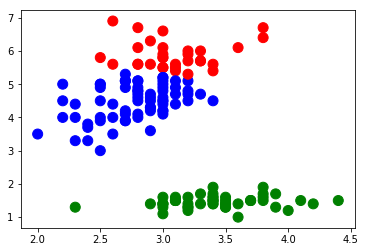

In [89]:
plt.figure()
colors=['green','red','blue']
plt.scatter(dnewWhole[:,0],dnewWhole[:,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')

In [90]:
# Picks 4 clusters
cl = hierarchy.fcluster(Z,4, criterion='maxclust')
crosstab(cl, y, rownames=['cl'], colnames=['y'])

y,0,1,2
cl,,,
1,0,0,2
2,0,50,48
3,49,0,0
4,1,0,0


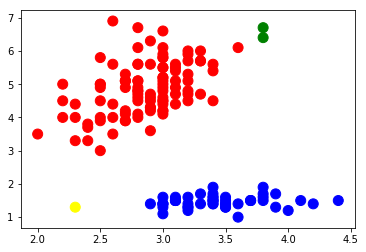

In [91]:
plt.figure()
colors=['green','red','blue','yellow']
plt.scatter(dnewWhole[:,0],dnewWhole[:,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')

In [92]:
# Picks 5 clusters
cl = hierarchy.fcluster(Z,5, criterion='maxclust')
crosstab(cl, y, rownames=['cl'], colnames=['y'])

y,0,1,2
cl,,,
1,0,0,2
2,0,49,48
3,0,1,0
4,49,0,0
5,1,0,0


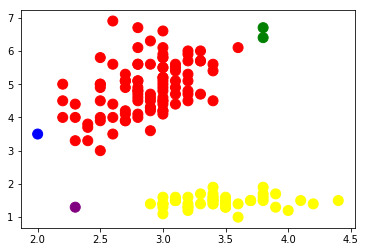

In [93]:
plt.figure()
colors=['green','red','blue','yellow','purple']
plt.scatter(dnewWhole[:,0],dnewWhole[:,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')

**Question 5**. Cross-tabulate results are useful for figuring out the quality of clustering. You task is to propose a formula that uses the result of cross-tabulation to come up with a single number that measures the success of clustering. Please jsutify why you selected the formula.


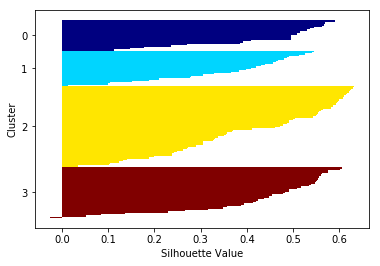

In [94]:
#credits: https://stackoverflow.com/questions/6644445/equivalent-of-matlabs-cluster-quality-function
# The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). 
# The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched
# to neighboring clusters.
# If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value,
# then the clustering configuration may have too many or too few clusters

import numpy as np
from scipy.cluster.vq import kmeans2
from scipy.spatial.distance import pdist, squareform
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib import cm

def silhouette(X, cIDX):
    N = X.shape[0]              # number of instances
    K = len(np.unique(cIDX))    # number of clusters

    # compute pairwise distance matrix
    D = squareform(pdist(X))

    # indices belonging to each cluster
    kIndices = [np.flatnonzero(cIDX==k) for k in range(K)]

    # compute a,b,s for each instance
    a = np.zeros(N)
    b = np.zeros(N)
    for i in range(N):
        # instances in same cluster other than instance itself
        a[i] = np.mean( [D[i][ind] for ind in kIndices[cIDX[i]] if ind!=i] )
        # instances in other clusters, one cluster at a time
        b[i] = np.min( [np.mean(D[i][ind]) 
                        for k,ind in enumerate(kIndices) if cIDX[i]!=k] )
    s = (b-a)/np.maximum(a,b)
    return s

def main():
    X = iris['data']

    # cluster and compute silhouette score
    K = 4
    C, cIDX = kmeans2(X, K)
    s = silhouette(X, cIDX)

    # plot
    order = np.lexsort((-s,cIDX))
    indices = [np.flatnonzero(cIDX[order]==k) for k in range(K)]
    ytick = [(np.max(ind)+np.min(ind))/2 for ind in indices]
    ytickLabels = ["%d" % x for x in range(K)]
    cmap = cm.jet( np.linspace(0,1,K) ).tolist()
    clr = [cmap[i] for i in cIDX[order]]

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.barh(range(X.shape[0]), s[order], height=1.0, 
            edgecolor='none', color=clr)
    ax.set_ylim(ax.get_ylim()[::-1])
    plt.yticks(ytick, ytickLabels)
    plt.xlabel('Silhouette Value')
    plt.ylabel('Cluster')
    plt.show()

if __name__ == '__main__':
    main()

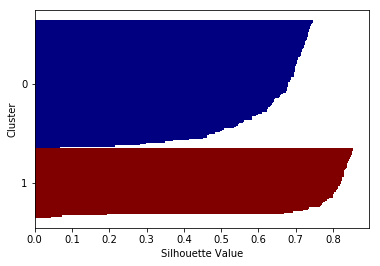

In [95]:
def main():
    X = iris['data']
    # cluster and compute silhouette score
    K = 2
    C, cIDX = kmeans2(X, K)
    s = silhouette(X, cIDX)

    # plot
    order = np.lexsort((-s,cIDX))
    indices = [np.flatnonzero(cIDX[order]==k) for k in range(K)]
    ytick = [(np.max(ind)+np.min(ind))/2 for ind in indices]
    ytickLabels = ["%d" % x for x in range(K)]
    cmap = cm.jet( np.linspace(0,1,K) ).tolist()
    clr = [cmap[i] for i in cIDX[order]]

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.barh(range(X.shape[0]), s[order], height=1.0, 
            edgecolor='none', color=clr)
    ax.set_ylim(ax.get_ylim()[::-1])
    plt.yticks(ytick, ytickLabels)
    plt.xlabel('Silhouette Value')
    plt.ylabel('Cluster')
    plt.show()

if __name__ == '__main__':
    main()

**Answer 5** 
- For this question I used Silhouette value to concluse the quality of a cluster. The silhouette value is a measure of how similar an object is to its own cluster compared to other clusters. The value range from -1 to 1. The closer it is to 1 the better the point fit to the cluster. 
- 2 plotted the data to 4 clusters and 2 clusters. The plots show that using 2 clusters is the best solution. Because most of the data in 2 clusters are have closest silhouette values to 1. That indicated that most of data in those 2 clusters fit well to its own cluster compared to other clusters.


**Question 6**. Repeat the clustering on the original Iris data, which has 4 attributes. Plot the scatter plot of the resulting clustering (remember, you can pick to see only 2 of the dimensions). Alternativelly, do SVD to project your data to 2 dimensionas and again plot the scatter plot. Take a look at the cross-tabulation. Try different clustering parameters and try to find the best clustering. Decide which choice of the parameters gives you the best results. Report on your findings with justifications for your conclusion.

In [96]:
# SVD
U,s,V = np.linalg.svd(d,full_matrices=0)
# Find rank-2 aproximation
k = 2
Ak = np.dot(U[:,0:k],np.dot(np.diag(s)[0:k,0:k], V[0:k,:]))



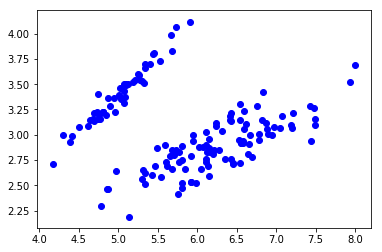

In [97]:
plt.scatter(Ak[:,0],Ak[:,1],color='blue');

In [103]:
A=range(0,150)
Z = hierarchy.linkage(Ak,method = 'average', metric = 'euclidean')
# Picks 2 clusters
cl = hierarchy.fcluster(Z,2, criterion='maxclust')
crosstab(cl, y, rownames=['cl'], colnames=['y'])


y,0,1,2
cl,,,
1,50,0,0
2,0,50,50


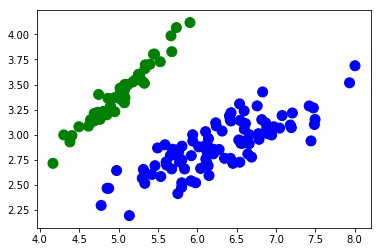

In [104]:
plt.figure()
colors=['green','blue']
plt.scatter(Ak[:,0],Ak[:,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')

## K-Means Clustering

K-means clustering is another clustering algorithm (we will cover it in class tomorrow). It still receives a data set as an input, as well as the desired number of clusters, and outputs the assignment of data points to clusters.

Let us illustrate how to use k-means on the iris data.

(150, 2)


y,0,1,2
cl,,,
0,35,0,0
1,0,26,19
2,0,0,31
3,0,24,0
4,15,0,0


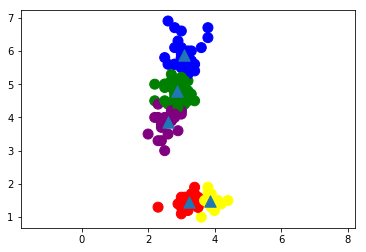

In [105]:
print (dnew.shape)
# the following command results in creating of 2 clusters of `dnew` data
kmeans = KMeans(n_clusters=5, random_state=0).fit(dnew)
# cl are the assignments of points to one of the 5 clusters
cl=kmeans.labels_
# cen are the centers of the 5 clusters, obtained by finding the average of all examples assigned to the clusters
cen=kmeans.cluster_centers_
# plot the results
colors=['red','green','blue','purple','yellow']
plt.figure()
#scatter column 1 and 2
plt.scatter(dnew[:,0],dnew[:,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
plt.scatter(cen[:,0],cen[:,1],s=130, marker="^")
plt.axis('equal')

# cross-tabulation with the flower types
crosstab(cl, y, rownames=['cl'], colnames=['y'])

**Question 7**. Discuss on the quality of outcome of k-means clustering


- The quality of out come succesful. It gave us a big picture of the clusters and provide us more information about the center points. It's because data set are very distinguish between each atributes. The cluster are linear separatable.


**Question 8**. Repeat k-means clustering, but this time change the nnumber of clusters to 3. Discuss the results. Compare the results with the results of hierarchical clustering from **Question 4**.

**Answer 8**

y,0,1,2
cl,,,
0,50,0,0
1,0,2,41
2,0,48,9


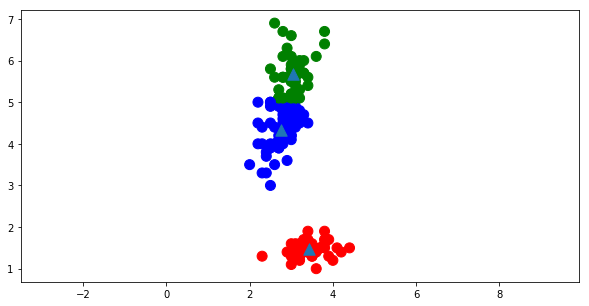

In [106]:
# the following command results in creating of 2 clusters of `dnew` data
kmeans = KMeans(n_clusters=3, random_state=0).fit(dnew)
# cl are the assignments of points to one of the 5 clusters
cl=kmeans.labels_
# cen are the centers of the 3 clusters, obtained by finding the average of all examples assigned to the clusters
cen=kmeans.cluster_centers_
# plot the results
colors=['red','green','blue']
plt.figure(figsize=(10,5))
#scatter column 1 and 2
plt.scatter(dnew[:,0],dnew[:,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
plt.scatter(cen[:,0],cen[:,1],s=130, marker="^")
plt.axis('equal')

# cross-tabulation with the flower types
crosstab(cl, y, rownames=['cl'], colnames=['y'])

- k means and Hierarchical Clustering both gave us the clear view of data and its cluster. It's because data set are very distinguish between each atributes.  

**Question 9**. Repeat k-means clustering on the whole Iris data set, the same as you did in **Question 6**. Discuss your results and compare them to the hierarchical clustering results.

y,0,1,2
cl,,,
0,35,0,0
1,0,26,19
2,0,0,31
3,0,24,0
4,15,0,0


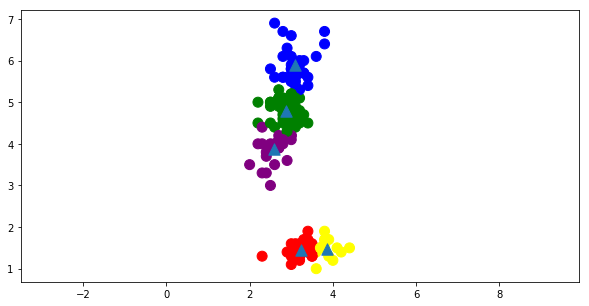

In [107]:
# the following command results in creating of 2 clusters of `dnew` data
kmeans = KMeans(n_clusters=5, random_state=0).fit(dnewWhole)
# cl are the assignments of points to one of the 5 clusters
cl=kmeans.labels_
# cen are the centers of the 5 clusters, obtained by finding the average of all examples assigned to the clusters
cen=kmeans.cluster_centers_
# plot the results
colors=['red','green','blue','purple','yellow']
plt.figure(figsize=(10,5))
#scatter column 1 and 2
plt.scatter(dnewWhole[:,0],dnewWhole[:,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
plt.scatter(cen[:,0],cen[:,1],s=130, marker="^")
plt.axis('equal')

# cross-tabulation with the flower types
crosstab(cl, y, rownames=['cl'], colnames=['y'])

## Lab 6.b Document Clustering (50% of grade)

In this part of the lab assignment, you will apply your clustering knowledge on the Newsgroup data from **Lab 5**. The following is a list of questions.

1. Select $N = 100$ random documents and their types from the newsgroup data. Use Google search to figure out how to do it in Python. The reason we are doing this is that hierrchical clustering can be very slow on large data sets.

2. Find 3 clusters using deafult (single-link, Eucliedan distance) hierarchical clustering. Use cross-tabulation to measure the quality of clustering.

3. Repeat step 2, by trying to find a better choice of parameters for hierarchical clustering. Try the Jaccard or cosine distance instead of Eucliedean. Report on your findings

4. Repeat step 3, but this type use k-means clustering. Compare with the results from step 3.

5. Instead of $N = 100$, select $N= 200, 500, 1000, 2000, 5000$ random documents. Set number of clusters to 5. Apply hierarchical and k-means clustering on such data and measure time. Discuss how does the time scale with $N$. For k-means clustering, discuss how do the clusters centers change as the data size increases -- do you see some qualitative improvements in the quality of clustering?

**Question 6**. Discuss your results and compare them to the hierarchical clustering results.

In [2]:
wordlist = np.loadtxt('wordlist.csv', delimiter=",",dtype='str')
documents = np.loadtxt('documents.csv', delimiter=",",dtype='int')
documents = np.transpose(documents)
newsgroup = np.loadtxt('newsgroup.csv', delimiter=",",dtype='int')
groupnames = np.loadtxt('groupnames.csv', delimiter=",",dtype='str')

NameError: name 'np' is not defined

In [397]:
#generate 100 number of index of documents matrix from 0 to documents.shape[0]
import random
randomIndex = random.sample(range(0, documents.shape[0]), 100)
#create documents100 numpy.narray by selected randome row with the randome index
randomDocuments=documents[randomIndex,:]
y=newsgroup[randomIndex]
totalWord=np.sum(randomDocuments, axis=1)
print (totalWord)

[ 6  3  4  1  1  4  3  1  4  1  3  2  6  5  2  5  2  1  7  5  2  3  2  3  1
  1  2  5  2  5  3  7  5  7  4  6  8  7  1  3  1  4  8 11  6  1  2  1  1  2
  1  2  2  6  5  4  2  3  1  4  6  6  4  3  3  1  3  4  6  1 14  5  1  1  4
  2  7  3  9  3  5  1  1  1  1  8  4  5  3 11  4  4  2  3  8  4  2  5 10  1]


In [398]:
#create a list of index start from 0
index = np.arange(totalWord.shape[0])
index[0:totalWord.shape[0]]
print(index)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74
 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]


In [399]:
newTable=np.array(list(zip(index,totalWord)))
print (newTable)

[[ 0  6]
 [ 1  3]
 [ 2  4]
 [ 3  1]
 [ 4  1]
 [ 5  4]
 [ 6  3]
 [ 7  1]
 [ 8  4]
 [ 9  1]
 [10  3]
 [11  2]
 [12  6]
 [13  5]
 [14  2]
 [15  5]
 [16  2]
 [17  1]
 [18  7]
 [19  5]
 [20  2]
 [21  3]
 [22  2]
 [23  3]
 [24  1]
 [25  1]
 [26  2]
 [27  5]
 [28  2]
 [29  5]
 [30  3]
 [31  7]
 [32  5]
 [33  7]
 [34  4]
 [35  6]
 [36  8]
 [37  7]
 [38  1]
 [39  3]
 [40  1]
 [41  4]
 [42  8]
 [43 11]
 [44  6]
 [45  1]
 [46  2]
 [47  1]
 [48  1]
 [49  2]
 [50  1]
 [51  2]
 [52  2]
 [53  6]
 [54  5]
 [55  4]
 [56  2]
 [57  3]
 [58  1]
 [59  4]
 [60  6]
 [61  6]
 [62  4]
 [63  3]
 [64  3]
 [65  1]
 [66  3]
 [67  4]
 [68  6]
 [69  1]
 [70 14]
 [71  5]
 [72  1]
 [73  1]
 [74  4]
 [75  2]
 [76  7]
 [77  3]
 [78  9]
 [79  3]
 [80  5]
 [81  1]
 [82  1]
 [83  1]
 [84  1]
 [85  8]
 [86  4]
 [87  5]
 [88  3]
 [89 11]
 [90  4]
 [91  4]
 [92  2]
 [93  3]
 [94  8]
 [95  4]
 [96  2]
 [97  5]
 [98 10]
 [99  1]]


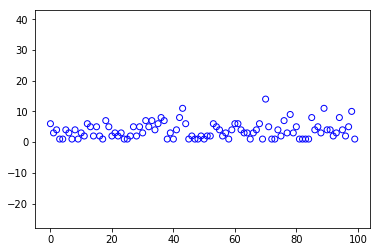

In [400]:
plt.ylim([0,10])
plt.scatter(index,totalWord,facecolors='none',color='blue')
plt.axis('equal');

In [401]:
A=range(0,100)#number of row
new = newTable[A,0:2]#row, #column
# Build a dendrogram using single-linkage clustering and Euclidean distance
Z = hierarchy.linkage(new,method = 'average', metric = 'euclidean')
# Picks 3 clusters
cl = hierarchy.fcluster(Z1, 3, criterion='maxclust')


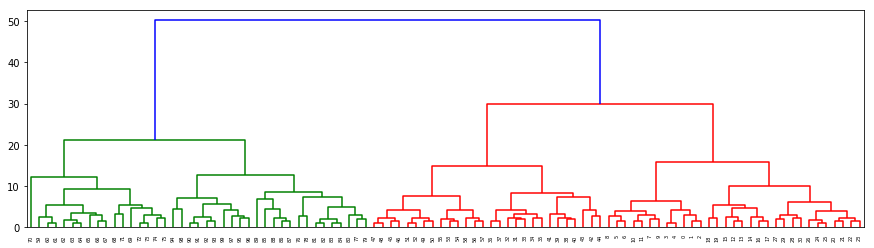

In [402]:
plt.figure(figsize = (15,4))
hierarchy.dendrogram(Z);

In [404]:
# cross-tabulation with the flower types
crosstab(cl, y , rownames=['cl'], colnames=['y'])

y,1,2,3,4
cl,,,,
1,1,0,0,1
2,34,13,11,25
3,6,2,2,5


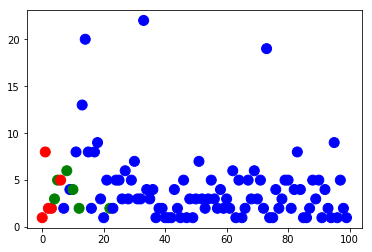

In [368]:
plt.figure()
colors=['red','blue','green']
plt.scatter(new[A,0],new[A,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')


**Try cosine**

In [369]:
Z1 = hierarchy.linkage(new,method = 'average', metric = 'cosine')
# Picks 3 clusters
cl1 = hierarchy.fcluster(Z1, 3, criterion='maxclust')

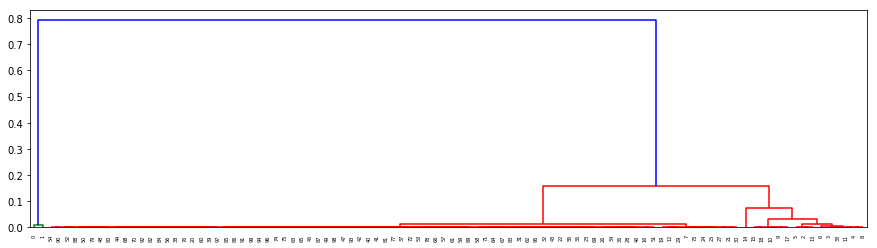

In [370]:
plt.figure(figsize = (15,4))
hierarchy.dendrogram(Z1);

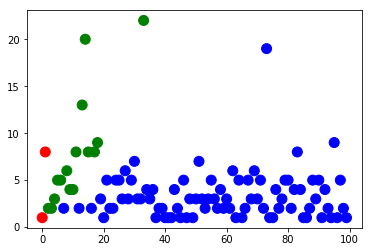

In [371]:
plt.figure()
colors=['red','blue','green']
plt.scatter(new[A,0],new[A,1],c=cl1, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')

In [372]:
# cross-tabulation with the flower types
crosstab(cl, y, rownames=['cl'], colnames=['y'])

y,1,2,3,4
cl,,,,
1,1,1,1,2
2,33,19,11,26
3,2,2,0,2


y,1,2,3,4
cl,,,,
0,11,4,2,8
1,7,5,2,11
2,9,8,3,5
3,9,5,5,6


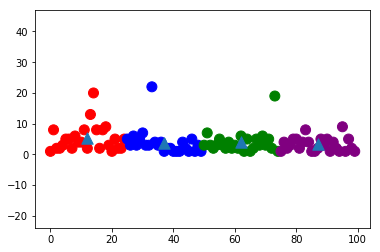

In [373]:
#KMEAN
# the following command results in creating of 2 clusters of `dnew` data
kmeans = KMeans(n_clusters=4, random_state=0).fit(new)
# cl are the assignments of points to one of the 5 clusters
cl=kmeans.labels_
# cen are the centers of the 4 clusters, obtained by finding the average of all examples assigned to the clusters
cen=kmeans.cluster_centers_
# plot the results
colors=['red','green','blue','purple']
plt.figure()
#scatter column 1 and 2
plt.scatter(new[:,0],new[:,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
plt.scatter(cen[:,0],cen[:,1],s=130, marker="^")
plt.axis('equal')

# cross-tabulation with the flower types
crosstab(cl, y, rownames=['cl'], colnames=['y'])

**200**

In [374]:
#generate 100 number of index of documents matrix from 0 to documents.shape[0]
randomIndex = random.sample(range(0, documents.shape[0]), 200)
#create documents100 numpy.narray by selected randome row with the randome index
randomDocuments=documents[randomIndex,:]
y=newsgroup[randomIndex]
totalWord=np.sum(randomDocuments, axis=1)
print (totalWord)

[ 6  7  6  6  4  3  3  3  6  2  3  5  4  2  2  1 11  5  5  2 20  2  3  4  3
  2  6  3  6 10  4  1  2  1  4  4  3  6  7  3  6  2  9  9  3  6  3  5  4  1
  2 12  5  4  8  2  1  7  5  3  3  2  2  1  2  3  1  4  8 13  5  2  6  1  3
  7  1  8  3  2  2  2  5  5  2  4  7  1 11  8  3  2  6  3  2  5  4  3  3  1
  1  7  5  5  1  4  3  6  1  7  5  2  8  3  6  2 15  1  6  5  4  2  4  3  7
  3  9  3  4  3  1  1  5  5  8  4  2  5  2  1  4  1  4  2 13  2  1  3 13  5
  3  3  2  5  2  8  4  1  2  1  2  1  2  4  3  3  9  3  1  3  2  5  1  2  2
  1  4  2 11  2  1  7  2 17  9  6  6  4 24  6  4  1  1  2  4  9  8  3  1  8]


In [375]:
#create a list of index start from 0
index = np.arange(totalWord.shape[0])
index[0:totalWord.shape[0]]
print(index)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199]


In [376]:
newTable=np.array(list(zip(index,totalWord)))
print (newTable)

[[  0   6]
 [  1   7]
 [  2   6]
 [  3   6]
 [  4   4]
 [  5   3]
 [  6   3]
 [  7   3]
 [  8   6]
 [  9   2]
 [ 10   3]
 [ 11   5]
 [ 12   4]
 [ 13   2]
 [ 14   2]
 [ 15   1]
 [ 16  11]
 [ 17   5]
 [ 18   5]
 [ 19   2]
 [ 20  20]
 [ 21   2]
 [ 22   3]
 [ 23   4]
 [ 24   3]
 [ 25   2]
 [ 26   6]
 [ 27   3]
 [ 28   6]
 [ 29  10]
 [ 30   4]
 [ 31   1]
 [ 32   2]
 [ 33   1]
 [ 34   4]
 [ 35   4]
 [ 36   3]
 [ 37   6]
 [ 38   7]
 [ 39   3]
 [ 40   6]
 [ 41   2]
 [ 42   9]
 [ 43   9]
 [ 44   3]
 [ 45   6]
 [ 46   3]
 [ 47   5]
 [ 48   4]
 [ 49   1]
 [ 50   2]
 [ 51  12]
 [ 52   5]
 [ 53   4]
 [ 54   8]
 [ 55   2]
 [ 56   1]
 [ 57   7]
 [ 58   5]
 [ 59   3]
 [ 60   3]
 [ 61   2]
 [ 62   2]
 [ 63   1]
 [ 64   2]
 [ 65   3]
 [ 66   1]
 [ 67   4]
 [ 68   8]
 [ 69  13]
 [ 70   5]
 [ 71   2]
 [ 72   6]
 [ 73   1]
 [ 74   3]
 [ 75   7]
 [ 76   1]
 [ 77   8]
 [ 78   3]
 [ 79   2]
 [ 80   2]
 [ 81   2]
 [ 82   5]
 [ 83   5]
 [ 84   2]
 [ 85   4]
 [ 86   7]
 [ 87   1]
 [ 88  11]
 [ 89   8]
 [ 90   3]

In [377]:
A=range(0,200)#number of row
new = newTable[A,0:2]#row, #column
# Build a dendrogram using single-linkage clustering and Euclidean distance
Z = hierarchy.linkage(new,method = 'average', metric = 'euclidean')
# Picks 3 clusters
cl = hierarchy.fcluster(Z, 5, criterion='maxclust')

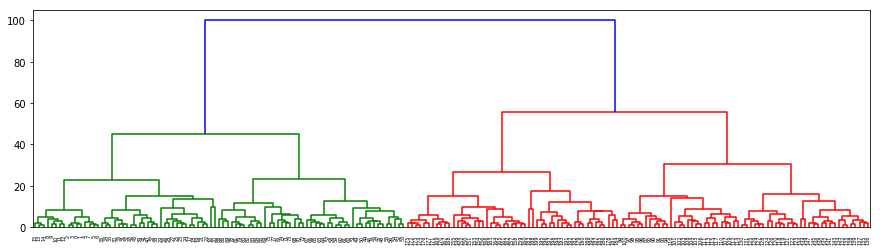

In [378]:
plt.figure(figsize = (15,4))
hierarchy.dendrogram(Z);

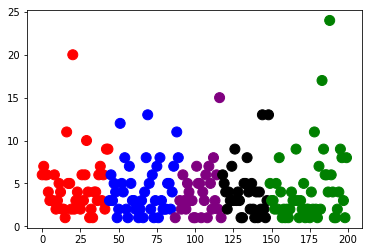

In [379]:
plt.figure()
colors=['red','blue','green','purple','black']
plt.scatter(new[A,0],new[A,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')

In [380]:
# cross-tabulation with the flower types
crosstab(cl, y , rownames=['cl'], colnames=['y'])

y,1,2,3,4
cl,,,,
1,9,13,8,14
2,13,12,10,10
3,16,13,12,10
4,16,7,2,4
5,7,8,3,13


y,1,2,3,4
cl,,,,
0,7,13,8,13
1,13,10,9,8
2,17,11,2,9
3,10,11,6,13
4,14,8,10,8


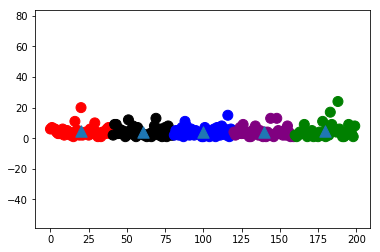

In [381]:
#KMEAN
# the following command results in creating of 5 clusters of `dnew` data
kmeans = KMeans(n_clusters=5, random_state=0).fit(new)
# cl are the assignments of points to one of the 5 clusters
cl=kmeans.labels_
# cen are the centers of the 4 clusters, obtained by finding the average of all examples assigned to the clusters
cen=kmeans.cluster_centers_
# plot the results
colors=['red','green','blue','purple','black']
plt.figure()
#scatter column 1 and 2
plt.scatter(new[:,0],new[:,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
plt.scatter(cen[:,0],cen[:,1],s=130, marker="^")
plt.axis('equal')

# cross-tabulation with the flower types
crosstab(cl, y, rownames=['cl'], colnames=['y'])

**500**

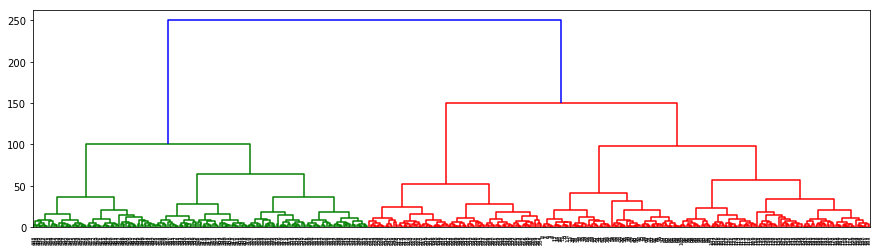

In [382]:
#generate 500 number of index of documents matrix from 0 to documents.shape[0]
randomIndex = random.sample(range(0, documents.shape[0]), 500)
#create documents100 numpy.narray by selected randome row with the randome index
randomDocuments=documents[randomIndex,:]
y=newsgroup[randomIndex]
totalWord=np.sum(randomDocuments, axis=1)
#create a list of index start from 0
index = np.arange(totalWord.shape[0])
index[0:totalWord.shape[0]]
newTable=np.array(list(zip(index,totalWord)))
A=range(0,500)#number of row
new = newTable[A,0:2]#row, #column
# Build a dendrogram using single-linkage clustering and Euclidean distance
Z = hierarchy.linkage(new,method = 'average', metric = 'euclidean')
# Picks 3 clusters
cl = hierarchy.fcluster(Z, 5, criterion='maxclust')
plt.figure(figsize = (15,4))
hierarchy.dendrogram(Z);

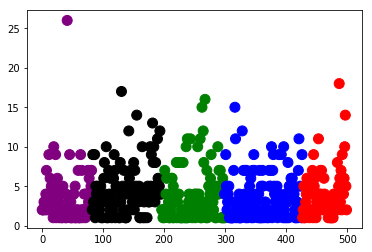

In [383]:
plt.figure()
colors=['red','blue','green','purple','black']
plt.scatter(new[A,0],new[A,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')

In [384]:
# cross-tabulation with the flower types
crosstab(cl, y , rownames=['cl'], colnames=['y'])

y,1,2,3,4
cl,,,,
1,24,15,13,21
2,43,23,23,38
3,32,23,16,33
4,21,14,18,29
5,24,29,20,41


y,1,2,3,4
cl,,,,
0,20,27,17,37
1,36,16,19,28
2,30,24,15,32
3,31,20,17,30
4,27,17,22,35


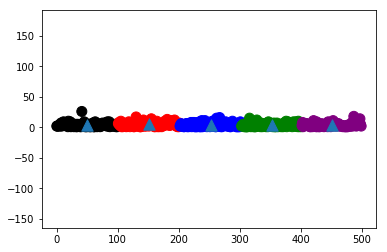

In [385]:
#KMEAN
# the following command results in creating of 2 clusters of `dnew` data
kmeans = KMeans(n_clusters=5, random_state=0).fit(new)
# cl are the assignments of points to one of the 5 clusters
cl=kmeans.labels_
# cen are the centers of the 4 clusters, obtained by finding the average of all examples assigned to the clusters
cen=kmeans.cluster_centers_
# plot the results
colors=['red','green','blue','purple','black']
plt.figure()
#scatter column 1 and 2
plt.scatter(new[:,0],new[:,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
plt.scatter(cen[:,0],cen[:,1],s=130, marker="^")
plt.axis('equal')

# cross-tabulation with the flower types
crosstab(cl, y, rownames=['cl'], colnames=['y'])

**1000,2000,5000**

In [386]:
#generate 500 number of index of documents matrix from 0 to documents.shape[0]
randomIndex = random.sample(range(0, documents.shape[0]), 1000)
#create documents100 numpy.narray by selected randome row with the randome index
randomDocuments=documents[randomIndex,:]
y=newsgroup[randomIndex]
totalWord=np.sum(randomDocuments, axis=1)
#create a list of index start from 0
index = np.arange(totalWord.shape[0])
index[0:totalWord.shape[0]]
newTable=np.array(list(zip(index,totalWord)))
A=range(0,1000)#number of row
new = newTable[A,0:2]#row, #column
# Build a dendrogram using single-linkage clustering and Euclidean distance
Z = hierarchy.linkage(new,method = 'average', metric = 'euclidean')
# Picks 3 clusters
cl = hierarchy.fcluster(Z, 5, criterion='maxclust')

y,1,2,3,4
cl,,,,
1,47,34,27,51
2,75,38,32,59
3,72,62,57,88
4,49,43,30,55
5,46,39,25,71


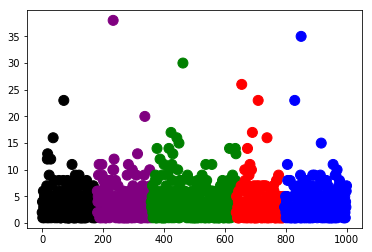

In [387]:
plt.figure()
colors=['red','blue','green','purple','black']
plt.scatter(new[A,0],new[A,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
# cross-tabulation with the flower types
crosstab(cl, y , rownames=['cl'], colnames=['y'])

y,1,2,3,4
cl,,,,
0,56,46,36,60
1,52,43,25,80
2,74,38,32,58
3,47,49,43,60
4,60,40,35,66


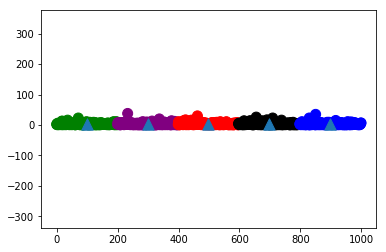

In [388]:
#KMEAN
# the following command results in creating of 2 clusters of `dnew` data
kmeans = KMeans(n_clusters=5, random_state=0).fit(new)
# cl are the assignments of points to one of the 5 clusters
cl=kmeans.labels_
# cen are the centers of the 4 clusters, obtained by finding the average of all examples assigned to the clusters
cen=kmeans.cluster_centers_
# plot the results
colors=['red','green','blue','purple','black']
plt.figure()
#scatter column 1 and 2
plt.scatter(new[:,0],new[:,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
plt.scatter(cen[:,0],cen[:,1],s=130, marker="^")
plt.axis('equal')

# cross-tabulation with the flower types
crosstab(cl, y, rownames=['cl'], colnames=['y'])

**1000**

y,1,2,3,4
cl,,,,
1,64,45,37,84
2,69,47,44,85
3,49,33,33,55
4,45,25,32,40
5,52,52,35,74


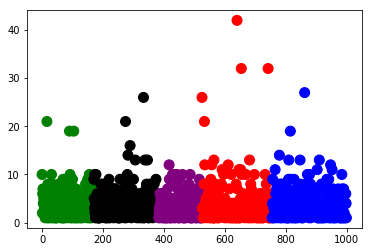

In [389]:
#generate number of index of documents matrix from 0 to documents.shape[0]
randomIndex = random.sample(range(0, documents.shape[0]), 1000)
#create documents numpy.narray by selected randome row with the randome index
randomDocuments=documents[randomIndex,:]
y=newsgroup[randomIndex]
totalWord=np.sum(randomDocuments, axis=1)
#create a list of index start from 0
index = np.arange(totalWord.shape[0])
index[0:totalWord.shape[0]]
newTable=np.array(list(zip(index,totalWord)))
A=range(0,1000)#number of row
new = newTable[A,0:2]#row, #column
# Build a dendrogram using single-linkage clustering and Euclidean distance
Z = hierarchy.linkage(new,method = 'average', metric = 'euclidean')
# Picks 3 clusters
cl = hierarchy.fcluster(Z, 5, criterion='maxclust')
plt.figure()
colors=['red','blue','green','purple','black']
plt.scatter(new[A,0],new[A,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
# cross-tabulation with the flower types
crosstab(cl, y , rownames=['cl'], colnames=['y'])

y,1,2,3,4
cl,,,,
0,65,31,41,62
1,56,41,40,63
2,56,41,33,71
3,50,50,30,69
4,52,39,37,73


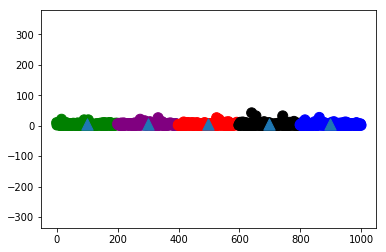

In [390]:
#KMEAN
# the following command results in creating of 2 clusters of `dnew` data
kmeans = KMeans(n_clusters=5, random_state=0).fit(new)
# cl are the assignments of points to one of the 5 clusters
cl=kmeans.labels_
# cen are the centers of the 4 clusters, obtained by finding the average of all examples assigned to the clusters
cen=kmeans.cluster_centers_
# plot the results
colors=['red','green','blue','purple','black']
plt.figure()
#scatter column 1 and 2
plt.scatter(new[:,0],new[:,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
plt.scatter(cen[:,0],cen[:,1],s=130, marker="^")
plt.axis('equal')

# cross-tabulation with the flower types
crosstab(cl, y, rownames=['cl'], colnames=['y'])

**2000**

y,1,2,3,4
cl,,,,
1,118,77,60,134
2,131,107,74,153
3,130,114,74,155
4,210,137,107,219


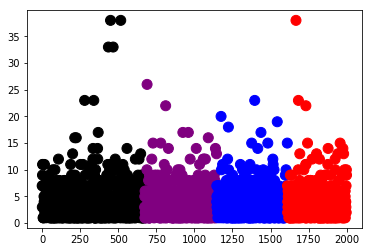

In [391]:
#generate number of index of documents matrix from 0 to documents.shape[0]
randomIndex = random.sample(range(0, documents.shape[0]), 2000)
#create documents numpy.narray by selected randome row with the randome index
randomDocuments=documents[randomIndex,:]
y=newsgroup[randomIndex]
totalWord=np.sum(randomDocuments, axis=1)
#create a list of index start from 0
index = np.arange(totalWord.shape[0])
index[0:totalWord.shape[0]]
newTable=np.array(list(zip(index,totalWord)))
A=range(0,2000)#number of row
new = newTable[A,0:2]#row, #column
# Build a dendrogram using single-linkage clustering and Euclidean distance
Z = hierarchy.linkage(new,method = 'average', metric = 'euclidean')
# Picks 3 clusters
cl = hierarchy.fcluster(Z, 4, criterion='maxclust')
plt.figure()
colors=['red','blue','green','purple','black']
plt.scatter(new[A,0],new[A,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
# cross-tabulation with the flower types
crosstab(cl, y , rownames=['cl'], colnames=['y'])

y,1,2,3,4
cl,,,,
0,147,101,77,172
1,158,96,89,161
2,138,116,86,158
3,146,122,63,170


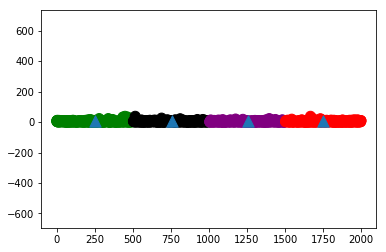

In [392]:
#KMEAN
# the following command results in creating of 2 clusters of `dnew` data
kmeans = KMeans(n_clusters=4, random_state=0).fit(new)
# cl are the assignments of points to one of the 5 clusters
cl=kmeans.labels_
# cen are the centers of the 4 clusters, obtained by finding the average of all examples assigned to the clusters
cen=kmeans.cluster_centers_
# plot the results
colors=['red','green','blue','purple','black']
plt.figure()
#scatter column 1 and 2
plt.scatter(new[:,0],new[:,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
plt.scatter(cen[:,0],cen[:,1],s=130, marker="^")
plt.axis('equal')

# cross-tabulation with the flower types
crosstab(cl, y, rownames=['cl'], colnames=['y'])

**5000**

y,1,2,3,4
cl,,,,
1,234,199,135,285
2,355,261,212,426
3,328,252,222,411
4,490,333,287,570


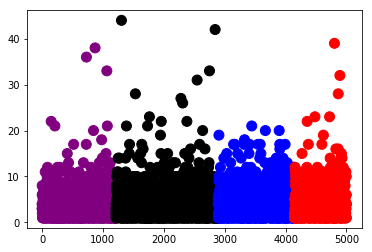

In [393]:
#generate number of index of documents matrix from 0 to documents.shape[0]
randomIndex = random.sample(range(0, documents.shape[0]), 5000)
#create documents numpy.narray by selected randome row with the randome index
randomDocuments=documents[randomIndex,:]
y=newsgroup[randomIndex]
totalWord=np.sum(randomDocuments, axis=1)
#create a list of index start from 0
index = np.arange(totalWord.shape[0])
index[0:totalWord.shape[0]]
newTable=np.array(list(zip(index,totalWord)))
A=range(0,5000)#number of row
new = newTable[A,0:2]#row, #column
# Build a dendrogram using single-linkage clustering and Euclidean distance
Z = hierarchy.linkage(new,method = 'average', metric = 'euclidean')
# Picks 3 clusters
cl = hierarchy.fcluster(Z, 4, criterion='maxclust')
plt.figure()
colors=['red','blue','green','purple','black']
plt.scatter(new[A,0],new[A,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
# cross-tabulation with the flower types
crosstab(cl, y , rownames=['cl'], colnames=['y'])

y,1,2,3,4
cl,,,,
0,333,257,227,420
1,357,278,207,421
2,365,252,206,422
3,352,258,216,429


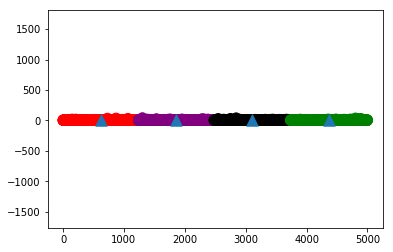

In [394]:
#KMEAN
# the following command results in creating of 2 clusters of `dnew` data
kmeans = KMeans(n_clusters=4, random_state=0).fit(new)
# cl are the assignments of points to one of the 5 clusters
cl=kmeans.labels_
# cen are the centers of the 4 clusters, obtained by finding the average of all examples assigned to the clusters
cen=kmeans.cluster_centers_
# plot the results
colors=['red','green','blue','purple','black']
plt.figure()
#scatter column 1 and 2
plt.scatter(new[:,0],new[:,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
plt.scatter(cen[:,0],cen[:,1],s=130, marker="^")
plt.axis('equal')

# cross-tabulation with the flower types
crosstab(cl, y, rownames=['cl'], colnames=['y'])

- The quality of the data sample get better as the size of the data get bigger.
- However the data is not linear reperatable , therefore, any algorithm will fail separate the data point.
- With this type of non linear reperatable, we need to use other futher technique to analyze and represent the data 